In [2]:
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns

data_df = pd.read_csv("Data_Science_Salaries_Clean.csv")
data_df = pd.DataFrame(data_df)
data_df


,Unnamed: 0,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
2223,3289,Machine Learning Engineer,Full-Time,Senior,Expert,40000,Euro,Croatia,45618,Croatia,Small,2020
2224,3291,Data Scientist,Full-Time,Mid,Intermediate,160000,Singapore Dollar,Israel,119059,Singapore,Medium,2021
2225,3293,Data Engineer,Full-Time,Mid,Intermediate,24000,Euro,Malta,28369,Malta,Large,2021
2226,3295,Data Scientist,Full-Time,Senior,Expert,412000,United States Dollar,United States,412000,United States,Large,2020


In [4]:
salary_stats_df = data_df.groupby("Job Title")["Salary in USD"].agg(["mean", "median", "max", "min"])
salary_stats_df = salary_stats_df.rename(columns={"mean": "Average Salary", "median": "Median Salary", "max": "Maximum Salary", "min": "Minimum Salary"})
salary_stats_df = salary_stats_df.applymap('${:,.2f}'.format)
salary_stats_df

#-----------------------------------------------------------------------------------------------------------------
#This DataFrame displays a the statistics beind each Job Title regardless of Experience Level or Expertiise Level 

,Average Salary,Median Salary,Maximum Salary,Minimum Salary
Job Title,,,,
Analytics Engineer,"$154,258.96","$149,400.00","$430,640.00","$48,000.00"
Data Analyst,"$109,500.38","$105,320.00","$430,967.00","$15,000.00"
Data Engineer,"$142,033.87","$135,223.00","$333,500.00","$17,025.00"
Data Scientist,"$141,886.16","$140,000.00","$412,000.00","$16,000.00"
Machine Learning Engineer,"$167,249.51","$161,310.00","$392,000.00","$20,000.00"


In [5]:
experience_salary_stats_df = data_df.groupby(["Job Title", "Experience Level"])["Salary in USD"].agg(["mean", "median", "max", "min"])
experience_salary_stats_df = experience_salary_stats_df.rename(columns={"mean": "Average Salary", "median": "Median Salary", "max": "Maximum Salary", "min": "Minimum Salary"})
experience_salary_stats_df = experience_salary_stats_df.applymap('${:,.2f}'.format)
experience_salary_df = experience_salary_stats_df.reindex(["Entry", "Mid", "Senior", "Executive"], level="Experience Level")
experience_salary_df

#-----------------------------------------------------------------------------------------------------------------
#This DataFrame displays a the statistics beind each Job Title at every Experience Level

Average Salary Median Salary  \
Job Title                 Experience Level                                
Analytics Engineer        Entry               $101,333.33    $90,000.00   
                          Mid                 $129,486.05   $112,400.00   
                          Senior              $159,379.76   $152,250.00   
                          Executive           $175,125.00   $166,000.00   
Data Analyst              Entry                $64,327.75    $57,920.00   
                          Mid                  $99,194.70    $93,000.00   
                          Senior              $123,588.47   $119,610.00   
                          Executive           $113,750.00   $120,000.00   
Data Engineer             Entry                $75,370.02    $65,000.00   
                          Mid                 $105,866.78    $95,000.00   
                          Senior              $155,895.87   $152,437.50   
                          Executive           $194,317.00   $200,000.00   
Data Scientist            Entry                $75,021.37    $74,141.00   
                          Mid                  $96,619.08    $90,367.00   
                          Senior              $167,714.71   $164,500.00   
                          Executive           $188,429.58   $185,000.00   
Machine Learning Engineer Entry                $98,389.35    $92,500.00   
                          Mid                 $131,848.55   $126,277.00   
                          Senior              $184,850.77   $182,200.00   

                                           Maximum Salary Minimum Salary  
Job Title                 Experience Level                                
Analytics Engineer        Entry               $130,000.00     $84,000.00  
                          Mid                 $430,640.00     $48,000.00  
                          Senior              $289,800.00     $48,000.00  
                          Executive           $221,000.00    $135,000.00  
Data Analyst              Entry               $150,000.00     $15,000.00  
                          Mid                 $430,967.00     $15,680.00  
                          Senior              $385,000.00     $15,809.00  
                          Executive           $160,000.00     $55,000.00  
Data Engineer             Entry               $160,000.00     $17,025.00  
                          Mid                 $260,000.00     $20,000.00  
                          Senior              $331,640.00     $25,000.00  
                          Executive           $333,500.00     $71,908.00  
Data Scientist            Entry               $190,000.00     $16,000.00  
                          Mid                 $230,000.00     $16,904.00  
                          Senior              $412,000.00     $20,171.00  
                          Executive           $300,000.00     $78,000.00  
Machine Learning Engineer Entry               $250,000.00     $20,000.00  
                          Mid                 $300,000.00     $20,984.00  
                          Senior              $392,000.00     $24,342.00

In [35]:
new_experience_salary_stats_df = data_df.groupby(["Job Title", "Experience Level"])["Salary in USD"].agg(["mean"])
new_experience_salary_stats_df = new_experience_salary_stats_df.rename(columns={"mean": "Average Salary"})
newer_experience_salary_df = new_experience_salary_stats_df.reindex(["Entry", "Mid", "Senior", "Executive"], level="Experience Level")
newer_experience_salary_df

#-----------------------------------------------------------------------------------------------------------------
#This DataFrame displays the Average Salary beind each Job Title at every Experience Level

Average Salary
Job Title                 Experience Level                
Analytics Engineer        Entry              101333.333333
                          Mid                129486.047619
                          Senior             159379.760000
                          Executive          175125.000000
Data Analyst              Entry               64327.754386
                          Mid                 99194.704000
                          Senior             123588.472527
                          Executive          113750.000000
Data Engineer             Entry               75370.023256
                          Mid                105866.783133
                          Senior             155895.868182
                          Executive          194317.000000
Data Scientist            Entry               75021.366667
                          Mid                 96619.082278
                          Senior             167714.711055
                          Executive          188429.578947
Machine Learning Engineer Entry               98389.350000
                          Mid                131848.552239
                          Senior             184850.769953

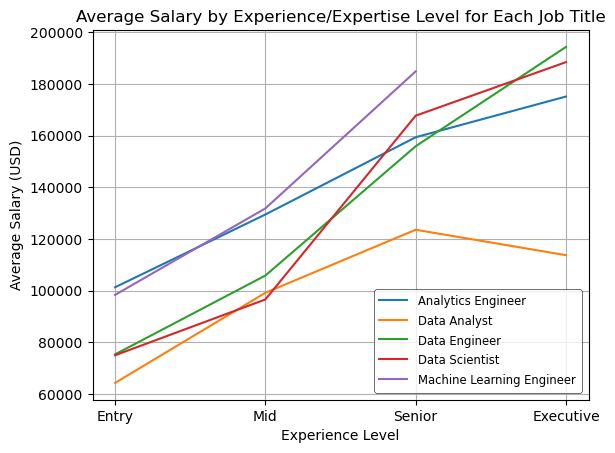

In [42]:
job_titles = newer_experience_salary_df.index.get_level_values(0).unique()
fig, ax = plt.subplots()
for job_title in job_titles:
    experience_levels = newer_experience_salary_df.loc[job_title].index
    average_salaries = newer_experience_salary_df.loc[job_title]["Average Salary"]
    ax.plot(experience_levels, average_salaries, label=job_title)
    


ax.set_xlabel("Experience Level")
ax.set_ylabel("Average Salary (USD)")
ax.set_title("Average Salary by Experience Level for Each Job Title")
legend = ax.legend(loc='lower right')
legend.get_frame().set_linewidth(0.5)  
legend.get_frame().set_edgecolor('black')  
plt.setp(legend.get_texts(), fontsize='small')  

plt.grid()

plt.show()

#-----------------------------------------------------------------------------------------------------------------
#This Plot displays the Average Salary beind each Job Title at every Experience Level

In [32]:
expert_salary_stats_df = data_df.groupby(["Job Title", "Expertise Level"])["Salary in USD"].agg(["mean", "median", "max", "min"])
expert_salary_stats_df = expert_salary_stats_df.rename(columns={"mean": "Average Salary", "median": "Median Salary", "max": "Maximum Salary", "min": "Minimum Salary"})
expert_salary_stats_df = expert_salary_stats_df.applymap('${:,.2f}'.format)
expert_salary_df = expert_salary_stats_df.reindex(["Junior", "Intermediate", "Expert", "Director"], level="Expertise Level")
expert_salary_df

#-----------------------------------------------------------------------------------------------------------------
#This DataFrame displays a the statistics beind each Job Title at every Expertise Level

Average Salary Median Salary  \
Job Title                 Expertise Level                                
Analytics Engineer        Junior             $101,333.33    $90,000.00   
                          Intermediate       $129,486.05   $112,400.00   
                          Expert             $159,379.76   $152,250.00   
                          Director           $175,125.00   $166,000.00   
Data Analyst              Junior              $64,327.75    $57,920.00   
                          Intermediate        $99,194.70    $93,000.00   
                          Expert             $123,588.47   $119,610.00   
                          Director           $113,750.00   $120,000.00   
Data Engineer             Junior              $75,370.02    $65,000.00   
                          Intermediate       $105,866.78    $95,000.00   
                          Expert             $155,895.87   $152,437.50   
                          Director           $194,317.00   $200,000.00   
Data Scientist            Junior              $75,021.37    $74,141.00   
                          Intermediate        $96,619.08    $90,367.00   
                          Expert             $167,714.71   $164,500.00   
                          Director           $188,429.58   $185,000.00   
Machine Learning Engineer Junior              $98,389.35    $92,500.00   
                          Intermediate       $131,848.55   $126,277.00   
                          Expert             $184,850.77   $182,200.00   

                                          Maximum Salary Minimum Salary  
Job Title                 Expertise Level                                
Analytics Engineer        Junior             $130,000.00     $84,000.00  
                          Intermediate       $430,640.00     $48,000.00  
                          Expert             $289,800.00     $48,000.00  
                          Director           $221,000.00    $135,000.00  
Data Analyst              Junior             $150,000.00     $15,000.00  
                          Intermediate       $430,967.00     $15,680.00  
                          Expert             $385,000.00     $15,809.00  
                          Director           $160,000.00     $55,000.00  
Data Engineer             Junior             $160,000.00     $17,025.00  
                          Intermediate       $260,000.00     $20,000.00  
                          Expert             $331,640.00     $25,000.00  
                          Director           $333,500.00     $71,908.00  
Data Scientist            Junior             $190,000.00     $16,000.00  
                          Intermediate       $230,000.00     $16,904.00  
                          Expert             $412,000.00     $20,171.00  
                          Director           $300,000.00     $78,000.00  
Machine Learning Engineer Junior             $250,000.00     $20,000.00  
                          Intermediate       $300,000.00     $20,984.00  
                          Expert             $392,000.00     $24,342.00

In [25]:
new_expert_salary_stats_df = data_df.groupby(["Job Title", "Expertise Level"])["Salary in USD"].agg(["mean"])
new_expert_salary_stats_df = new_expert_salary_stats_df.rename(columns={"mean": "Average Salary"})
newer_expert_salary_stats_df = expert_salary_stats_df.reindex(["Junior", "Intermediate", "Expert", "Director"], level="Expertise Level")


newer_expert_salary_stats_df

#-----------------------------------------------------------------------------------------------------------------
#This DataFrame displays the Average Salary beind each Job Title at every Expertise Level

Average Salary
Job Title                 Expertise Level                
Analytics Engineer        Junior            101333.333333
                          Intermediate      129486.047619
                          Expert            159379.760000
                          Director          175125.000000
Data Analyst              Junior             64327.754386
                          Intermediate       99194.704000
                          Expert            123588.472527
                          Director          113750.000000
Data Engineer             Junior             75370.023256
                          Intermediate      105866.783133
                          Expert            155895.868182
                          Director          194317.000000
Data Scientist            Junior             75021.366667
                          Intermediate       96619.082278
                          Expert            167714.711055
                          Director          188429.578947
Machine Learning Engineer Junior             98389.350000
                          Intermediate      131848.552239
                          Expert            184850.769953

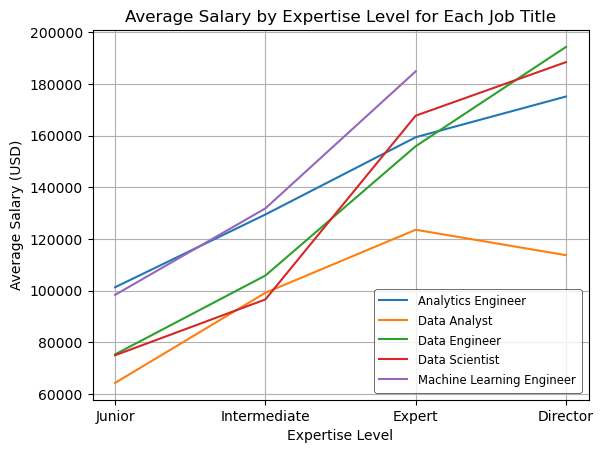

In [31]:
job_titles = newer_expert_salary_stats_df.index.get_level_values(0).unique()
fig, ax = plt.subplots()
for job_title in job_titles:
    expertise_levels = newer_expert_salary_stats_df.loc[job_title].index
    average_salaries = newer_expert_salary_stats_df.loc[job_title]["Average Salary"]
    ax.plot(expertise_levels, average_salaries, label=job_title)
    
ax.set_xlabel("Expertise Level")
ax.set_ylabel("Average Salary (USD)")
ax.set_title("Average Salary by Expertise Level for Each Job Title")

legend = ax.legend(loc='lower right')
legend.get_frame().set_linewidth(0.5)  
legend.get_frame().set_edgecolor('black')  
plt.setp(legend.get_texts(), fontsize='small')  

plt.grid()

plt.show()

#This PLot displays the Average Salary beind each Job Title at every Expertise Level

In [ ]:
)